In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npf
import local_tools as tools
import local_tools_v2 as tools2
import importlib
import numpy as np
import keras
import gc
import timeit
import seaborn as sns
%matplotlib inline

In [2]:
file_app_data = './data/application_train.csv'
file_test_data = './data/application_test.csv'
file_prev_app = './data/previous_application.csv'
file_cred_bal = './data/credit_card_balance.csv'
file_inst_pay = './data/installments_payments.csv'
file_pos_cash = './data/POS_CASH_balance.csv'
file_bureau =   './data/bureau.csv'
file_bureau_bal = './data/bureau_balance.csv'

In [3]:
app_data = pd.read_csv(file_app_data)
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [4]:
test_data = pd.read_csv(file_test_data)
test_data.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

              ...             FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                            0                0   
1             ...                            0                0   
2             ...                            0                0   
3             ...                            0                0   
4             ...                            0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        0.0   
4                0                0                        NaN   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        NaN                         NaN   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        1.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         0.0  
1                         3.0  
2                         4.0  
3                         3.0  
4                         NaN  

[5 rows x 121 columns]

In [5]:
app_data.index = app_data['SK_ID_CURR'].values

In [6]:
test_data.index = test_data['SK_ID_CURR'].values

In [7]:
app_data_id = app_data['SK_ID_CURR'].copy(deep=True)
app_data_tg = app_data['TARGET'].copy(deep=True)
test_data_id = test_data['SK_ID_CURR'].copy(deep=True)

In [8]:
app_data.drop(['SK_ID_CURR'], inplace=True, axis=1)
test_data.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [9]:
app_data.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
100002       1         Cash loans           M            N               Y   
100003       0         Cash loans           F            N               N   
100004       0    Revolving loans           M            Y               Y   
100006       0         Cash loans           F            N               Y   
100007       0         Cash loans           M            N               Y   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
100002             0          202500.0    406597.5      24700.5   
100003             0          270000.0   1293502.5      35698.5   
100004             0           67500.0    135000.0       6750.0   
100006             0          135000.0    312682.5      29686.5   
100007             0          121500.0    513000.0      21865.5   

        AMT_GOODS_PRICE             ...             FLAG_DOCUMENT_18  \
100002         351000.0             ...                            0   
100003        1129500.0             ...                            0   
100004         135000.0             ...                            0   
100006         297000.0             ...                            0   
100007         513000.0             ...                            0   

       FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
100002                0                0                0   
100003                0                0                0   
100004                0                0                0   
100006                0                0                0   
100007                0                0                0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
100002                        0.0                        0.0   
100003                        0.0                        0.0   
100004                        0.0                        0.0   
100006                        NaN                        NaN   
100007                        0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
100002                         0.0                        0.0   
100003                         0.0                        0.0   
100004                         0.0                        0.0   
100006                         NaN                        NaN   
100007                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
100002                        0.0                         1.0  
100003                        0.0                         0.0  
100004                        0.0                         0.0  
100006                        NaN                         NaN  
100007                        0.0                         0.0  

[5 rows x 121 columns]

# Application data

In [10]:
app_data = tools2.correctApplication(app_data)
test_data = tools2.correctApplication(test_data)

In [11]:
app_data, test_data = app_data.align(test_data, join='inner', axis=1)

In [12]:
app_data.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
100002         Cash loans           M            N               Y   
100003         Cash loans           F            N               N   
100004    Revolving loans           M            Y               Y   
100006         Cash loans           F            N               Y   
100007         Cash loans           M            N               Y   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
100002             0          202500.0    406597.5      24700.5   
100003             0          270000.0   1293502.5      35698.5   
100004             0           67500.0    135000.0       6750.0   
100006             0          135000.0    312682.5      29686.5   
100007             0          121500.0    513000.0      21865.5   

        AMT_GOODS_PRICE NAME_TYPE_SUITE        ...         FLAG_DOCUMENT_19  \
100002         351000.0   Unaccompanied        ...                        0   
100003        1129500.0          Family        ...                        0   
100004         135000.0   Unaccompanied        ...                        0   
100006         297000.0   Unaccompanied        ...                        0   
100007         513000.0   Unaccompanied        ...                        0   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
100002                0                0                        0.0   
100003                0                0                        0.0   
100004                0                0                        0.0   
100006                0                0                        NaN   
100007                0                0                        0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
100002                        0.0                         0.0   
100003                        0.0                         0.0   
100004                        0.0                         0.0   
100006                        NaN                         NaN   
100007                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
100002                        0.0                        0.0   
100003                        0.0                        0.0   
100004                        0.0                        0.0   
100006                        NaN                        NaN   
100007                        0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  DAYS_EMPLOYED_ANM  
100002                         1.0                  0  
100003                         0.0                  0  
100004                         0.0                  0  
100006                         NaN                  0  
100007                         0.0                  0  

[5 rows x 121 columns]

In [13]:
test_data.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
100001         Cash loans           F            N               Y   
100005         Cash loans           M            N               Y   
100013         Cash loans           M            Y               Y   
100028         Cash loans           F            N               Y   
100038         Cash loans           M            Y               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
100001             0          135000.0    568800.0      20560.5   
100005             0           99000.0    222768.0      17370.0   
100013             0          202500.0    663264.0      69777.0   
100028             2          315000.0   1575000.0      49018.5   
100038             1          180000.0    625500.0      32067.0   

        AMT_GOODS_PRICE NAME_TYPE_SUITE        ...         FLAG_DOCUMENT_19  \
100001         450000.0   Unaccompanied        ...                        0   
100005         180000.0   Unaccompanied        ...                        0   
100013         630000.0             NaN        ...                        0   
100028        1575000.0   Unaccompanied        ...                        0   
100038         625500.0   Unaccompanied        ...                        0   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
100001                0                0                        0.0   
100005                0                0                        0.0   
100013                0                0                        0.0   
100028                0                0                        0.0   
100038                0                0                        NaN   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
100001                        0.0                         0.0   
100005                        0.0                         0.0   
100013                        0.0                         0.0   
100028                        0.0                         0.0   
100038                        NaN                         NaN   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
100001                        0.0                        0.0   
100005                        0.0                        0.0   
100013                        0.0                        1.0   
100028                        0.0                        0.0   
100038                        NaN                        NaN   

        AMT_REQ_CREDIT_BUREAU_YEAR  DAYS_EMPLOYED_ANM  
100001                         0.0                  0  
100005                         3.0                  0  
100013                         4.0                  0  
100028                         3.0                  0  
100038                         NaN                  0  

[5 rows x 121 columns]

# Handle missing values, label encoding, and onehot encoding

In [14]:
from sklearn.preprocessing import Imputer, LabelEncoder

imp_mode = Imputer(strategy='most_frequent', verbose=1)
imp_mean = Imputer(strategy='mean', verbose=1)
le = LabelEncoder()

In [15]:
df = app_data.copy(deep=True)
followers = [test_data.copy(deep=True)]

df, followers, app_label_dict = tools2.massageDataset(df, followers=followers, verbose=True)

NAME_CONTRACT_TYPE -- type object
CODE_GENDER -- type object
FLAG_OWN_CAR -- type object
FLAG_OWN_REALTY -- type object
CNT_CHILDREN -- type int64
AMT_INCOME_TOTAL -- type float64
AMT_CREDIT -- type float64
AMT_ANNUITY -- type float64
AMT_GOODS_PRICE -- type float64
NAME_TYPE_SUITE -- type object
NAME_INCOME_TYPE -- type object
NAME_EDUCATION_TYPE -- type object
NAME_FAMILY_STATUS -- type object
NAME_HOUSING_TYPE -- type object
REGION_POPULATION_RELATIVE -- type float64
DAYS_BIRTH -- type int64
DAYS_EMPLOYED -- type float64
DAYS_REGISTRATION -- type float64
DAYS_ID_PUBLISH -- type int64
OWN_CAR_AGE -- type float64
FLAG_MOBIL -- type int64
FLAG_EMP_PHONE -- type int64
FLAG_WORK_PHONE -- type int64
FLAG_CONT_MOBILE -- type int64
FLAG_PHONE -- type int64
FLAG_EMAIL -- type int64
OCCUPATION_TYPE -- type object
CNT_FAM_MEMBERS -- type float64
REGION_RATING_CLIENT -- type int64
REGION_RATING_CLIENT_W_CITY -- type int64
WEEKDAY_APPR_PROCESS_START -- type object
HOUR_APPR_PROCESS_START -- type

In [16]:
app_data = df.copy(deep=True)
test_data = followers[0].copy(deep=True)

### Connect app and prev app data before onehot encoding all of them at once. Then split them apart.

In [17]:
all_app_data = pd.concat([app_data, test_data], axis=0)

In [18]:
all_app_data = pd.get_dummies(all_app_data, columns=list(app_label_dict.keys()))

In [19]:
all_app_data.columns.values

array(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG

In [20]:
app_data = all_app_data.loc[app_data.index, :]
test_data = all_app_data.loc[test_data.index, :]

In [ ]:
del all_app_data
gc.enable()
gc.collect()

In [ ]:
app_corr = app_data.corr()

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(np.abs(app_corr), cmap = plt.cm.RdYlBu_r, vmin = 0, annot = False, vmax = 0.2)
plt.title('Correlation Heatmap');

### My thoughts
I don't know what features to pick. I think I should leave it to NN to decide.

# Prev app data

In [ ]:
importlib.reload(tools2)

In [21]:
prev_app_data = pd.read_csv(file_prev_app)

In [22]:
prev_app_data = tools2.correctPrevApp(prev_app_data)

In [23]:
prev_app_data, _, prev_label_dict = tools2.massageDataset(prev_app_data)

SK_ID_PREV -- type int64
SK_ID_CURR -- type int64
NAME_CONTRACT_TYPE -- type object
AMT_ANNUITY -- type float64
AMT_APPLICATION -- type float64
AMT_CREDIT -- type float64
AMT_DOWN_PAYMENT -- type float64
AMT_GOODS_PRICE -- type float64
WEEKDAY_APPR_PROCESS_START -- type object
HOUR_APPR_PROCESS_START -- type int64
FLAG_LAST_APPL_PER_CONTRACT -- type object
NFLAG_LAST_APPL_IN_DAY -- type int64
RATE_DOWN_PAYMENT -- type float64
RATE_INTEREST_PRIMARY -- type float64
RATE_INTEREST_PRIVILEGED -- type float64
NAME_CASH_LOAN_PURPOSE -- type object
NAME_CONTRACT_STATUS -- type object
DAYS_DECISION -- type int64
NAME_PAYMENT_TYPE -- type object
CODE_REJECT_REASON -- type object
NAME_TYPE_SUITE -- type object
NAME_CLIENT_TYPE -- type object
NAME_GOODS_CATEGORY -- type object
NAME_PORTFOLIO -- type object
NAME_PRODUCT_TYPE -- type object
CHANNEL_TYPE -- type object
SELLERPLACE_AREA -- type int64
NAME_SELLER_INDUSTRY -- type object
CNT_PAYMENT -- type float64
NAME_YIELD_GROUP -- type object
PRODUC

In [24]:
prev_app_data = pd.get_dummies(prev_app_data, columns=list(prev_label_dict.keys()))

In [25]:
prev_app_data

SK_ID_PREV  SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0           2030495      271877   1730.430000          17145.0     17145.0   
1           2802425      108129  25188.615000         607500.0    679671.0   
2           2523466      122040  15060.735000         112500.0    136444.5   
3           2819243      176158  47041.335000         450000.0    470790.0   
4           1784265      202054  31924.395000         337500.0    404055.0   
5           1383531      199383  23703.930000         315000.0    340573.5   
6           2315218      175704  15955.120659              0.0         0.0   
7           1656711      296299  15955.120659              0.0         0.0   
8           2367563      342292  15955.120659              0.0         0.0   
9           2579447      334349  15955.120659              0.0         0.0   
10          1715995      447712  11368.620000         270000.0    335754.0   
11          2257824      161140  13832.775000         211500.0    246397.5   
12          2330894      258628  12165.210000         148500.0    174361.5   
13          1397919      321676   7654.860000          53779.5     57564.0   
14          2273188      270658   9644.220000          26550.0     27252.0   
15          1232483      151612  21307.455000         126490.5    119853.0   
16          2163253      154602   4187.340000          26955.0     27297.0   
17          1285768      142748   9000.000000         180000.0    180000.0   
18          2393109      396305  10181.700000         180000.0    180000.0   
19          1173070      199178   4666.500000          45000.0     49455.0   
20          1506815      166490  25454.025000         450000.0    491580.0   
21          1182516      267782  20361.600000         405000.0    451777.5   
22          1172842      302212  15955.120659              0.0         0.0   
23          1172937      302212  39475.305000        1129500.0   1277104.5   
24          1555330      199353  15955.120659              0.0         0.0   
25          1543131      275707  22619.520000         229500.0    241920.0   
26          2536650      338725  16708.320000         369000.0    369000.0   
27          1676258      433469  22242.825000         247500.0    268083.0   
28          2075578      418383   7656.705000          74610.0     65610.0   
29          1583704      315664  15955.120659              0.0         0.0   
...             ...         ...           ...              ...         ...   
1670184     1458393      279524  48458.025000        1575000.0   1762110.0   
1670185     2815037      422867  54411.570000         450000.0    531000.0   
1670186     1433968      272570  15955.120659              0.0         0.0   
1670187     1971628      435554  15955.120659              0.0         0.0   
1670188     1713281      247019  26446.500000         900000.0    900000.0   
1670189     2406354      377114  26240.715000         796500.0    954207.0   
1670190     2381880      175920  15955.120659              0.0         0.0   
1670191     1755809      122569   2250.000000          45000.0     45000.0   
1670192     2101747      339383   3375.000000              0.0     67500.0   
1670193     1120445      179433  15955.120659              0.0         0.0   
1670194     2101748      280792  10482.795000          90000.0    107604.0   
1670195     2561520      334654  24851.025000         248535.0    223681.5   
1670196     1662123      398290  15955.120659          57910.5     57910.5   
1670197     1854636      184353  15708.150000         153220.5    153220.5   
1670198     1540903      212968   2088.495000          22869.0     20578.5   
1670199     1077969      242303   8546.940000          37926.0     40932.0   
1670200     1024416      331038   7576.920000          99000.0    112068.0   
1670201     1028905      442706   6127.065000          45450.0     54126.0   
1670202     2205099      157707   4334.355000          22207.5     23854.5   
1670203     2844282      383898

# Credit balance

In [38]:
cred_data = pd.read_csv(file_cred_bal)

In [39]:
cred_data = cred_data.sort_values(['SK_ID_CURR', 'SK_ID_PREV','MONTHS_BALANCE'], ascending=False)
cred_data.head(50)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
140639      1794451      456250              -1   153832.725   
1049726     1794451      456250              -2   158266.935   
1154348     1794451      456250              -3   162425.565   
310299      1794451      456250              -4   166188.150   
1437743     1794451      456250              -5   169443.855   
431924      1794451      456250              -6   171943.020   
2248506     1794451      456250              -7   174435.885   
2985617     1794451      456250              -8   177219.000   
3734047     1794451      456250              -9   180536.760   
1684283     1794451      456250             -10   186577.605   
3611324     1794451      456250             -11   200208.915   
3000394     1794451      456250             -12   181993.500   
735902      2743495      456248              -2        0.000   
1155972     2743495      456248              -3        0.000   
1273254     2743495      456248              -4        0.000   
1345065     2743495      456248              -5        0.000   
789285      2743495      456248              -6        0.000   
2975089     2743495      456248              -7        0.000   
943502      2743495      456248              -8        0.000   
2575472     2743495      456248              -9        0.000   
3177685     2743495      456248             -10        0.000   
1406469     2743495      456248             -11        0.000   
3286792     2743495      456248             -12        0.000   
903311      2743495      456248             -13        0.000   
2423678     2743495      456248             -14        0.000   
3740421     2743495      456248             -15        0.000   
548271      2743495      456248             -16        0.000   
552210      2743495      456248             -17        0.000   
857081      2743495      456248             -18        0.000   
208806      2743495      456248             -19        0.000   
1331891     2743495      456248             -20        0.000   
569755      2743495      456248             -21        0.000   
1046758     2743495      456248             -22        0.000   
240997      2743495      456248             -23        0.000   
62806       2743495      456248             -24        0.000   
1148019     1595171      456247              -2        0.000   
1692394     1595171      456247              -3        0.000   
1346532     1595171      456247              -4        0.000   
1483136     1595171      456247              -5        0.000   
2148517     1595171      456247              -6        0.000   
2188642     1595171      456247              -7        0.000   
1091740     1595171      456247              -8        0.000   
907769      1595171      456247              -9        0.000   
1375383     1595171      456247             -10        0.000   
1266567     1595171      456247             -11        0.000   
1706269     1595171      456247             -12        0.000   
1624584     1595171      456247             -13        0.000   
2423915     1595171      456247             -14        0.000   
12169       1595171      456247             -15        0.000   
1854067     1595171      456247             -16        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
140639                    175500                       0.0   
1049726                   175500                       0.0   
1154348                   175500                       0.0   
310299                    180000                       0.0   
1437743                   180000                       0.0   
431924                    180000                       0.0   
2248506                   180000                       0.0   
2985617                   180000                       0.0   
3734047                   180000                       0.0   
1684283                   180000                       0.0   
3611324                   180000                    9000.0   


In [40]:
importlib.reload(tools2)

<module 'local_tools_v2' from '/Users/vikube/Documents/Machine Learning--projects/kaggle_home_credit_default/local_tools_v2.py'>

In [41]:
cred_data = tools2.correctCredBal(cred_data)

In [42]:
cred_data, _, cred_label_dict = tools2.massageDataset(cred_data)

SK_ID_PREV -- type int64
SK_ID_CURR -- type int64
MONTHS_BALANCE -- type int64
AMT_BALANCE -- type float64
AMT_CREDIT_LIMIT_ACTUAL -- type int64
AMT_DRAWINGS_ATM_CURRENT -- type float64
AMT_DRAWINGS_CURRENT -- type float64
AMT_DRAWINGS_OTHER_CURRENT -- type float64
AMT_DRAWINGS_POS_CURRENT -- type float64
AMT_INST_MIN_REGULARITY -- type float64
AMT_PAYMENT_CURRENT -- type float64
AMT_PAYMENT_TOTAL_CURRENT -- type float64
AMT_RECEIVABLE_PRINCIPAL -- type float64
AMT_RECIVABLE -- type float64
AMT_TOTAL_RECEIVABLE -- type float64
CNT_DRAWINGS_ATM_CURRENT -- type float64
CNT_DRAWINGS_CURRENT -- type int64
CNT_DRAWINGS_OTHER_CURRENT -- type float64
CNT_DRAWINGS_POS_CURRENT -- type float64
CNT_INSTALMENT_MATURE_CUM -- type float64
NAME_CONTRACT_STATUS -- type object
SK_DPD -- type int64
SK_DPD_DEF -- type int64


In [43]:
cred_label_dict

{'NAME_CONTRACT_STATUS': ['Active',
  'Approved',
  'Completed',
  'Demand',
  'Refused',
  'Sent proposal',
  'Signed']}

In [44]:
cred_data = pd.get_dummies(cred_data, columns=list(cred_label_dict.keys()))

# POS payment data

In [46]:
pos_data = pd.read_csv(file_pos_cash)

In [47]:
pos_data = pos_data.sort_values(['SK_ID_CURR', 'SK_ID_PREV', 'MONTHS_BALANCE'], ascending=False)

In [49]:
pos_data.head(50)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
8514315     2729207      456255             -13             3.0   
8606094     2729207      456255             -14             3.0   
573934      2729207      456255             -15             6.0   
8159633     2729207      456255             -16             6.0   
3069694     2631384      456255              -2            24.0   
2489728     2631384      456255              -3            36.0   
615709      2631384      456255              -4            36.0   
4876277     2631384      456255              -5            36.0   
3839119     2631384      456255              -6            36.0   
4544359     2631384      456255              -7            36.0   
2146444     2631384      456255              -8            36.0   
985362      2631384      456255              -9            36.0   
1042428     2631384      456255             -10            36.0   
1386050     2631384      456255             -11            36.0   
2413346     2631384      456255             -12            36.0   
4444981     2631384      456255             -13            36.0   
4064051     2631384      456255             -14            36.0   
2107119     2631384      456255             -15            36.0   
950855      2631384      456255             -16            36.0   
1383560     2631384      456255             -17            36.0   
1833725     2631384      456255             -18            36.0   
4017702     2631384      456255             -19            36.0   
4118340     2631384      456255             -20            36.0   
6836368     2631384      456255             -21            36.0   
4996086     2631384      456255             -22            36.0   
1152640     2631384      456255             -23            36.0   
4361533     2631384      456255             -24            36.0   
3766097     2631384      456255             -25            36.0   
3491866     2631384      456255             -26            36.0   
279186      2073384      456255             -17             3.0   
2320478     2073384      456255             -18             3.0   
2323250     2073384      456255             -19            24.0   
1926615     2073384      456255             -20            24.0   
5204638     2073384      456255             -21            24.0   
8695284     1743609      456255             -23            10.0   
8701943     1743609      456255             -24            12.0   
9223629     1743609      456255             -25            12.0   
5231565     1743609      456255             -26            12.0   
7405690     1743609      456255             -27            12.0   
8826070     1743609      456255             -28            12.0   
5268813     1743609      456255             -29            12.0   
6544987     1743609      456255             -30            12.0   
2427416     1743609      456255             -31            12.0   
8920857     1743609      456255             -32            12.0   
6475176     1743609      456255             -33            12.0   
6439473     1359084      456255              -7             8.0   
9966101     1359084      456255              -8            12.0   
7070470     1359084      456255              -9            12.0   
9166167     1359084      456255             -10            12.0   
3452851     1359084      456255             -11            12.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
8514315                    0.0            Completed       0           0  
8606094                    0.0               Active       0           0  
573934                     5.0               Active       0           0  
8159633                    6.0               Active       0           0  
3069694                    0.0            Completed       0           0  
2489728                   13.0               Active       0           0  
615709                    14.0               Active       0           0  

In [50]:
importlib.reload(tools2)

<module 'local_tools_v2' from '/Users/vikube/Documents/Machine Learning--projects/kaggle_home_credit_default/local_tools_v2.py'>

In [51]:
pos_data = tools2.correctPOS(pos_data)

In [52]:
pos_data, _, pos_label_dict = tools2.massageDataset(pos_data)

SK_ID_PREV -- type int64
SK_ID_CURR -- type int64
MONTHS_BALANCE -- type int64
CNT_INSTALMENT -- type float64
CNT_INSTALMENT_FUTURE -- type float64
NAME_CONTRACT_STATUS -- type object
SK_DPD -- type int64
SK_DPD_DEF -- type int64


(0.0, 365.0]           110116
(365.0, 730.0]            837
(730.0, 1095.0]           734
(1095.0, 1460.0]          459
(1460.0, 1825.0]          517
(1825.0, 2190.0]          489
(2190.0, 2555.0]          410
(2555.0, 2920.0]          248
(2920.0, 3285.0]          135
(3285.0, 3650.0]           24
(3650.0, 1000000.0]         0
dtype: int64

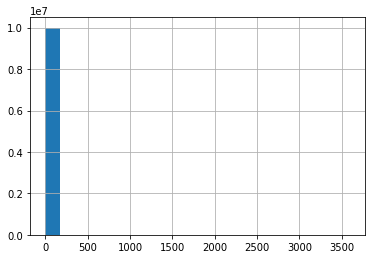

In [211]:
col = 'SK_DPD_DEF'
pos_data[col].hist(bins=21)
vals = pos_data[col].values
bincounts = pd.cut(vals, np.hstack((np.linspace(0,3650,11), 1e6)))
bincounts.value_counts()

# Installment payment data

In [80]:
inst_data = pd.read_csv(file_inst_pay).sort_values(['SK_ID_CURR','SK_ID_PREV','DAYS_INSTALMENT'])

In [81]:
importlib.reload(tools2)

<module 'local_tools_v2' from '/Users/vikube/Documents/Machine Learning--projects/kaggle_home_credit_default/local_tools_v2.py'>

In [82]:
inst_data = tools2.correctInst(inst_data)

In [55]:
inst_data.head(50)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
1478621     1369693      100001                     1.0   
2568722     1369693      100001                     1.0   
3458712     1369693      100001                     1.0   
2624024     1369693      100001                     2.0   
1761012     1851984      100001                     1.0   
3774071     1851984      100001                     1.0   
3435373     1851984      100001                     1.0   
2144879     1038818      100002                     1.0   
2163032     1038818      100002                     1.0   
1675768     1038818      100002                     1.0   
3343696     1038818      100002                     1.0   
2841063     1038818      100002                     1.0   
1807424     1038818      100002                     1.0   
3594829     1038818      100002                     1.0   
210205      1038818      100002                     1.0   
607863      1038818      100002                     1.0   
2646927     1038818      100002                     1.0   
2785201     1038818      100002                     1.0   
504426      1038818      100002                     1.0   
699804      1038818      100002                     1.0   
740300      1038818      100002                     1.0   
1703436     1038818      100002                     1.0   
185679      1038818      100002                     1.0   
916044      1038818      100002                     1.0   
1390511     1038818      100002                     1.0   
442432      1038818      100002                     2.0   
2627835     1810518      100003                     1.0   
13709       1810518      100003                     1.0   
446588      1810518      100003                     1.0   
1687015     1810518      100003                     1.0   
1206007     1810518      100003                     1.0   
3421285     1810518      100003                     1.0   
1179410     1810518      100003                     2.0   
3060457     2396755      100003                     1.0   
1532400     2396755      100003                     1.0   
2771895     2396755      100003                     1.0   
480811      2396755      100003                     1.0   
620125      2396755      100003                     1.0   
3164200     2396755      100003                     1.0   
1001994     2396755      100003                     1.0   
2004439     2396755      100003                     1.0   
570555      2396755      100003                     1.0   
1475983     2396755      100003                     1.0   
1519746     2396755      100003                     1.0   
1139956     2396755      100003                     1.0   
1479922     2636178      100003                     1.0   
1923162     2636178      100003                     1.0   
1872725     2636178      100003                     1.0   
1868790     2636178      100003                     1.0   
1233145     2636178      100003                     1.0   

         NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
1478621                      1          -1709.0             -1715.0   
2568722                      2          -1679.0             -1715.0   
3458712                      3          -1649.0             -1660.0   
2624024                      4          -1619.0             -1628.0   
1761012                      2          -2916.0             -2916.0   
3774071                      3          -2886.0             -2875.0   
3435373                      4          -2856.0             -2856.0   
2144879                      1           -565.0              -587.0   
2163032                      2           -535.0              -562.0   
1675768                      3           -505.0              -529.0   
3343696                      4           -475.0              -498.0   
2841063                      5           -445.0              -468.0   
1807424                      6           -415.0              -446.0   
35948

# Bureau data

In [84]:
br_data = pd.read_csv(file_bureau)

In [87]:
br_data = br_data.sort_values(['SK_ID_CURR', 'SK_ID_BUREAU'])

In [88]:
grouped = br_data.groupby('SK_ID_CURR')

In [89]:
grouped.count()

SK_ID_BUREAU  CREDIT_ACTIVE  CREDIT_CURRENCY  DAYS_CREDIT  \
SK_ID_CURR                                                              
100001                 7              7                7            7   
100002                 8              8                8            8   
100003                 4              4                4            4   
100004                 2              2                2            2   
100005                 3              3                3            3   
100007                 1              1                1            1   
100008                 3              3                3            3   
100009                18             18               18           18   
100010                 2              2                2            2   
100011                 4              4                4            4   
100013                 4              4                4            4   
100014                 8              8                8            8   
100015                 4              4                4            4   
100016                 7              7                7            7   
100017                 6              6                6            6   
100019                 2              2                2            2   
100020                 4              4                4            4   
100022                 2              2                2            2   
100023                13             13               13           13   
100025                 1              1                1            1   
100026                 3              3                3            3   
100027                 3              3                3            3   
100028                12             12               12           12   
100029                 4              4                4            4   
100030                 6              6                6            6   
100031                 7              7                7            7   
100032                 4              4                4            4   
100033                 1              1                1            1   
100035                 9              9                9            9   
100036                 1              1                1            1   
...                  ...            ...              ...          ...   
456220                 5              5                5            5   
456221                 5              5                5            5   
456223                 5              5                5            5   
456224                17             17               17           17   
456225                 9              9                9            9   
456226                 2              2                2            2   
456227                 4              4                4            4   
456229                 1              1                1            1   
456230                12             12               12           12   
456231                 7              7                7            7   
456232                 2              2                2            2   
456233                 1              1                1            1   
456234                10             10               10           10   
456235                 3              3                3            3   
456236                13             13               13           13   
456237                 1              1                1            1   
456238                 6              6                6            6   
456239                11             11               11           11   
456240                 2              2                2            2   
456241                 5              5                5            5   
456242                 1              1                1            1   
456243                 7              7                7            7 

One id can have many bureau id.

In [139]:
col = 'CREDIT_ACTIVE'
br_data[col].unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

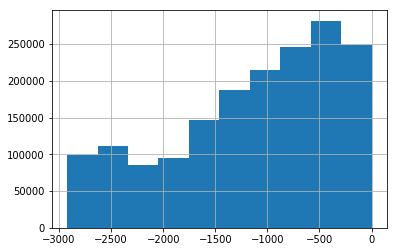

In [169]:
col = 'DAYS_CREDIT'
br_data[col].hist()

In [120]:
col = 'CREDIT_DAY_OVERDUE'
vals = br_data[col].values
bincounts = pd.cut(vals, np.linspace(0,3000,31))
bincounts.value_counts()

(0.0, 100.0]        2981
(100.0, 200.0]       280
(200.0, 300.0]        84
(300.0, 400.0]        47
(400.0, 500.0]        37
(500.0, 600.0]        21
(600.0, 700.0]        94
(700.0, 800.0]        37
(800.0, 900.0]        30
(900.0, 1000.0]       44
(1000.0, 1100.0]      39
(1100.0, 1200.0]      34
(1200.0, 1300.0]      35
(1300.0, 1400.0]      18
(1400.0, 1500.0]      29
(1500.0, 1600.0]      37
(1600.0, 1700.0]      34
(1700.0, 1800.0]      44
(1800.0, 1900.0]      19
(1900.0, 2000.0]      24
(2000.0, 2100.0]      25
(2100.0, 2200.0]      35
(2200.0, 2300.0]      41
(2300.0, 2400.0]      35
(2400.0, 2500.0]      19
(2500.0, 2600.0]      43
(2600.0, 2700.0]      43
(2700.0, 2800.0]       8
(2800.0, 2900.0]       0
(2900.0, 3000.0]       0
dtype: int64

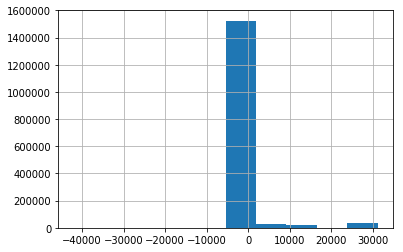

In [170]:
col = 'DAYS_CREDIT_ENDDATE'
br_data[col].hist()

In [171]:
edges = np.hstack((np.array(-50000), np.linspace(-3650, 3650, 21), np.array(50000)))
vals = br_data[col].values
bincounts = pd.cut(vals, edges)
bincounts.value_counts()

(-50000.0, -3650.0]       149
(-3650.0, -3285.0]          1
(-3285.0, -2920.0]          0
(-2920.0, -2555.0]      18549
(-2555.0, -2190.0]      79045
(-2190.0, -1825.0]      84974
(-1825.0, -1460.0]     105444
(-1460.0, -1095.0]     131813
(-1095.0, -730.0]      173385
(-730.0, -365.0]       192475
(-365.0, 0.0]          222437
(0.0, 365.0]           165715
(365.0, 730.0]         116367
(730.0, 1095.0]        114721
(1095.0, 1460.0]        68735
(1460.0, 1825.0]        50132
(1825.0, 2190.0]         2975
(2190.0, 2555.0]         3063
(2555.0, 2920.0]         1835
(2920.0, 3285.0]         2371
(3285.0, 3650.0]         2703
(3650.0, 50000.0]       73986
dtype: int64

In [147]:
col = 'DAYS_ENDDATE_FACT'
subdata = br_data.loc[ br_data['CREDIT_ACTIVE']=='Closed',:]

In [148]:
edges = np.hstack((np.array(-50000), np.linspace(-3650, 3650, 21), np.array(50000)))
vals = br_data[col].values
bincounts = pd.cut(vals, edges)
bincounts.value_counts()

(-50000.0, -3650.0]         1
(-3650.0, -3285.0]          0
(-3285.0, -2920.0]          2
(-2920.0, -2555.0]      22310
(-2555.0, -2190.0]      78960
(-2190.0, -1825.0]      80103
(-1825.0, -1460.0]      98971
(-1460.0, -1095.0]     145900
(-1095.0, -730.0]      205706
(-730.0, -365.0]       218058
(-365.0, 0.0]          232764
(0.0, 365.0]                0
(365.0, 730.0]              0
(730.0, 1095.0]             0
(1095.0, 1460.0]            0
(1460.0, 1825.0]            0
(1825.0, 2190.0]            0
(2190.0, 2555.0]            0
(2555.0, 2920.0]            0
(2920.0, 3285.0]            0
(3285.0, 3650.0]            0
(3650.0, 50000.0]           0
dtype: int64

In [160]:
col = 'AMT_CREDIT_MAX_OVERDUE'
br_data[col].describe()
vals = br_data[col].values

In [168]:
edges = np.hstack((np.linspace(0, 10e6, 11), np.array(1.2e8)))
vals = br_data[col].values
bincounts = pd.cut(vals, edges)
bincounts.value_counts()

(0.0, 1000000.0]             121169
(1000000.0, 2000000.0]           53
(2000000.0, 3000000.0]           29
(3000000.0, 4000000.0]            9
(4000000.0, 5000000.0]            8
(5000000.0, 6000000.0]            6
(6000000.0, 7000000.0]            1
(7000000.0, 8000000.0]            2
(8000000.0, 9000000.0]            2
(9000000.0, 10000000.0]           1
(10000000.0, 120000000.0]        10
dtype: int64

/Users/vikube/anaconda/envs/ML/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/vikube/anaconda/envs/ML/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


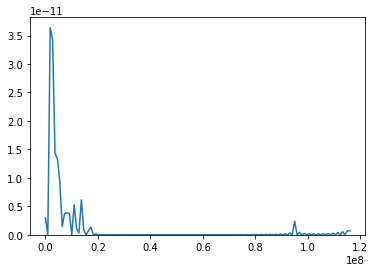

In [166]:
sns.kdeplot(vals, bw=1)

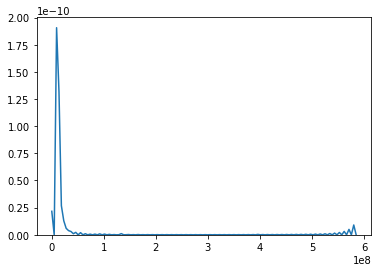

In [174]:
col = 'AMT_CREDIT_SUM'
vals = br_data.loc[br_data[col].notnull(), col].values
sns.kdeplot(vals)

In [175]:
edges = np.hstack((np.linspace(0, 10e6, 11), np.array(1.2e8)))
vals = br_data[col].values
bincounts = pd.cut(vals, edges)
bincounts.value_counts()

(0.0, 1000000.0]             1524037
(1000000.0, 2000000.0]         77826
(2000000.0, 3000000.0]         23777
(3000000.0, 4000000.0]          8392
(4000000.0, 5000000.0]          5216
(5000000.0, 6000000.0]          2645
(6000000.0, 7000000.0]          2403
(7000000.0, 8000000.0]          1283
(8000000.0, 9000000.0]          1411
(9000000.0, 10000000.0]          660
(10000000.0, 120000000.0]       2168
dtype: int64

In [176]:
br_data[col].median()

125518.5

(0.0, 1000000.0]             4147
(1000000.0, 2000000.0]          8
(2000000.0, 3000000.0]          1
(3000000.0, 4000000.0]          2
(4000000.0, 5000000.0]          0
(5000000.0, 6000000.0]          0
(6000000.0, 7000000.0]          0
(7000000.0, 8000000.0]          0
(8000000.0, 9000000.0]          0
(9000000.0, 10000000.0]         0
(10000000.0, 120000000.0]       0
dtype: int64

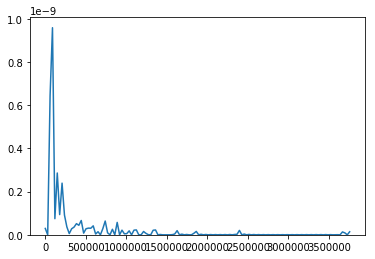

In [180]:
col = 'AMT_CREDIT_SUM_OVERDUE'
vals = br_data.loc[br_data[col].notnull(), col].values
sns.kdeplot(vals)
edges = np.hstack((np.linspace(0, 10e6, 11), np.array(1.2e8)))
vals = br_data[col].values
bincounts = pd.cut(vals, edges)
bincounts.value_counts()

(-50000.0, -3650.0]        95
(-3650.0, -3285.0]          0
(-3285.0, -2920.0]          0
(-2920.0, -2555.0]      14275
(-2555.0, -2190.0]      54209
(-2190.0, -1825.0]      53977
(-1825.0, -1460.0]      76162
(-1460.0, -1095.0]     118267
(-1095.0, -730.0]      258287
(-730.0, -365.0]       306726
(-365.0, 0.0]          834413
(0.0, 365.0]               16
(365.0, 730.0]              1
(730.0, 1095.0]             0
(1095.0, 1460.0]            0
(1460.0, 1825.0]            0
(1825.0, 2190.0]            0
(2190.0, 2555.0]            0
(2555.0, 2920.0]            0
(2920.0, 3285.0]            0
(3285.0, 3650.0]            0
(3650.0, 50000.0]           0
dtype: int64

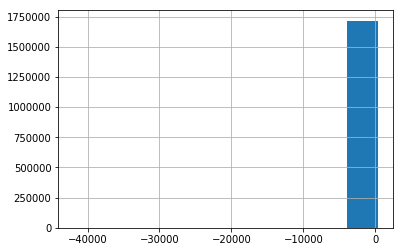

In [182]:
col = 'DAYS_CREDIT_UPDATE'
br_data[col].hist()
edges = np.hstack((np.array(-50000), np.linspace(-3650, 3650, 21), np.array(50000)))
vals = br_data[col].values
bincounts = pd.cut(vals, edges)
bincounts.value_counts()

(0.0, 1000000.0]             232263
(1000000.0, 2000000.0]          272
(2000000.0, 3000000.0]           80
(3000000.0, 4000000.0]           19
(4000000.0, 5000000.0]           28
(5000000.0, 6000000.0]            5
(6000000.0, 7000000.0]           11
(7000000.0, 8000000.0]           14
(8000000.0, 9000000.0]            3
(9000000.0, 10000000.0]           3
(10000000.0, 120000000.0]        24
dtype: int64

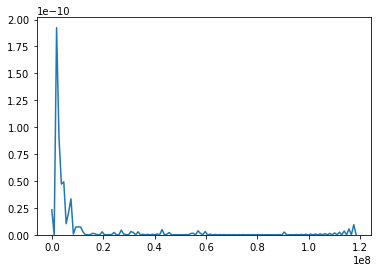

In [185]:
col = 'AMT_ANNUITY'
vals = br_data.loc[br_data[col].notnull(), col].values
sns.kdeplot(vals)
edges = np.hstack((np.linspace(0, 10e6, 11), np.array(1.2e8)))
vals = br_data[col].values
bincounts = pd.cut(vals, edges)
bincounts.value_counts()

In [190]:
importlib.reload(tools2)

<module 'local_tools_v2' from '/Users/vikube/Documents/Machine Learning--projects/kaggle_home_credit_default/local_tools_v2.py'>

In [191]:
br_data = tools2.correctBureau(br_data)

In [192]:
br_data, _, br_label_dict = tools2.massageDataset(br_data)

SK_ID_CURR -- type int64
SK_ID_BUREAU -- type int64
CREDIT_ACTIVE -- type object
CREDIT_CURRENCY -- type object
DAYS_CREDIT -- type int64
CREDIT_DAY_OVERDUE -- type int64
DAYS_CREDIT_ENDDATE -- type float64
DAYS_ENDDATE_FACT -- type float64
AMT_CREDIT_MAX_OVERDUE -- type float64
CNT_CREDIT_PROLONG -- type int64
AMT_CREDIT_SUM -- type float64
AMT_CREDIT_SUM_DEBT -- type float64
AMT_CREDIT_SUM_LIMIT -- type float64
AMT_CREDIT_SUM_OVERDUE -- type float64
CREDIT_TYPE -- type object
DAYS_CREDIT_UPDATE -- type int64
AMT_ANNUITY -- type float64
DAY_CREDIT_ENDDATE_NA -- type int64
DAYS_ENDDATE_FACT_NA -- type int64
AMT_CREDIT_MAX_OVERDUE_NA -- type int64


# Bureau Balance data

In [235]:
brb_data = pd.read_csv(file_bureau_bal)

In [236]:
# brb_data = brb_data.sort_values(['SK_ID_BUREAU', 'MONTHS_BALANCE'], ascending=False)

In [197]:
# brb_data.head(100)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
23544003       6842888               0      C
23544004       6842888              -1      C
23544005       6842888              -2      C
23544006       6842888              -3      C
23544007       6842888              -4      C
23544008       6842888              -5      C
23544009       6842888              -6      C
23544010       6842888              -7      C
23544011       6842888              -8      C
23544012       6842888              -9      C
23544013       6842888             -10      C
23544014       6842888             -11      C
23544015       6842888             -12      C
23544016       6842888             -13      C
23544017       6842888             -14      C
23544018       6842888             -15      C
23544019       6842888             -16      C
23544020       6842888             -17      C
23544021       6842888             -18      C
23544022       6842888             -19      C
23544023       6842888             -20      C
23544024       6842888             -21      C
23544025       6842888             -22      C
23544026       6842888             -23      C
23544027       6842888             -24      C
23544028       6842888             -25      C
23544029       6842888             -26      C
23544030       6842888             -27      C
23544031       6842888             -28      C
23544032       6842888             -29      C
...                ...             ...    ...
23543974       6842887              -8      C
23543975       6842887              -9      C
23543976       6842887             -10      C
23543977       6842887             -11      C
23543978       6842887             -12      C
23543979       6842887             -13      C
23543980       6842887             -14      C
23543981       6842887             -15      C
23543982       6842887             -16      C
23543983       6842887             -17      C
23543984       6842887             -18      C
23543985       6842887             -19      C
23543986       6842887             -20      C
23543987       6842887             -21      C
23543988       6842887             -22      C
23543989       6842887             -23      C
23543990       6842887             -24      C
23543991       6842887             -25      C
23543992       6842887             -26      C
23543993       6842887             -27      C
23543994       6842887             -28      C
23543995       6842887             -29      C
23543996       6842887             -30      C
23543997       6842887             -31      0
23543998       6842887             -32      0
23543999       6842887             -33      0
23544000       6842887             -34      0
23544001       6842887             -35      0
23544002       6842887             -36      0
23543933       6842886               0      C

[100 rows x 3 columns]

In [198]:
brb_data['STATUS'].unique()

array(['C', '0', '1', '5', 'X', '2', '4', '3'], dtype=object)

In [241]:
grouped = brb_data.groupby(['SK_ID_BUREAU'])
inds = grouped['MONTHS_BALANCE'].transform(max) == brb_data['MONTHS_BALANCE']
brb_data = brb_data[inds]

In [243]:
brb_data.shape

(817395, 3)